In [3]:
import pandas as pd
import glob

files = sorted(glob.glob("../datasets/*.csv"))
print("Datasets found:")
for f in files:
    print(" -", f)


Datasets found:
 - ../datasets\Co-oridnates.csv
 - ../datasets\Info_for_PCZ.csv
 - ../datasets\Suburb_Population.csv
 - ../datasets\charger_info_mel.csv
 - ../datasets\clustered_suburbs.csv
 - ../datasets\ml_ev_charging_dataset.csv
 - ../datasets\optimal_prices_all_suburbs.csv
 - ../datasets\road_congestion.csv
 - ../datasets\stations_per_town.csv
 - ../datasets\vehicle_registrations.csv


In [5]:
import pandas as pd
import numpy as np
import glob
import re

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

def norm_colnames(df):
    df = df.copy()
    df.columns = (
        df.columns.astype(str)
        .str.strip()
        .str.replace(r"\s+", "_", regex=True)
        .str.replace(r"[^\w_]", "", regex=True)
    )
    return df

def quick_review(df, name):
    print("\n" + "="*90)
    print(f"FILE: {name}")
    print("="*90)
    print("Shape:", df.shape)
    print("\nColumns:")
    print(list(df.columns))

    print("\nDtypes:")
    print(df.dtypes)

    # Missing
    miss = df.isna().sum()
    miss = miss[miss > 0].sort_values(ascending=False)
    if len(miss):
        print("\nMissing values (top):")
        print(miss.head(15))
    else:
        print("\nNo missing values")

    # Duplicate rows
    print("\nDuplicate rows:", df.duplicated().sum())

    print("\nHead:")
    display(df.head(3))


files = sorted(glob.glob("../datasets/*.csv"))

dfs = {}
for f in files:
    df = pd.read_csv(f)
    df = norm_colnames(df)
    dfs[f] = df
    quick_review(df, f)



FILE: ../datasets\Co-oridnates.csv
Shape: (198, 4)

Columns:
['Unnamed_0', 'suburb', 'latitude', 'longitude']

Dtypes:
Unnamed_0      int64
suburb        object
latitude     float64
longitude    float64
dtype: object

Missing values (top):
latitude     24
longitude    24
suburb        1
dtype: int64

Duplicate rows: 0

Head:


,Unnamed_0,suburb,latitude,longitude
0,0,Albury,-37.544234,145.007641
1,1,Black Rock,-37.970656,145.021282
2,2,Harcourt,-37.837435,145.111535



FILE: ../datasets\Info_for_PCZ.csv
Shape: (350, 4)

Columns:
['Town', 'All_Private_Dwellings', 'Median_Weekly_Household_Income', 'Average_Motor_Vehicles_per_Dwelling']

Dtypes:
Town                                    object
All_Private_Dwellings                   object
Median_Weekly_Household_Income          object
Average_Motor_Vehicles_per_Dwelling    float64
dtype: object

Missing values (top):
All_Private_Dwellings                  7
Average_Motor_Vehicles_per_Dwelling    7
Median_Weekly_Household_Income         6
dtype: int64

Duplicate rows: 0

Head:


,Town,All_Private_Dwellings,Median_Weekly_Household_Income,Average_Motor_Vehicles_per_Dwelling
0,Abbotsford,"9,364","$2,333",1.6
1,Airport West,"3,890","$1,761",1.7
2,Albert Park,"53,131","$2,076",1.1



FILE: ../datasets\Suburb_Population.csv
Shape: (350, 2)

Columns:
['Town', 'Population']

Dtypes:
Town          object
Population     int64
dtype: object

No missing values

Duplicate rows: 0

Head:


,Town,Population
0,Abbotsford,10294
1,Airport West,8647
2,Albert Park,17184



FILE: ../datasets\charger_info_mel.csv
Shape: (262, 11)

Columns:
['Charger_Name', 'Address', 'Suburb', 'State', 'Postal_Code', 'Power_kW', 'Usage_Cost', 'Number_of_Points', 'Connection_Types', 'latitude', 'longitude']

Dtypes:
Charger_Name         object
Address              object
Suburb               object
State                object
Postal_Code          object
Power_kW             object
Usage_Cost           object
Number_of_Points    float64
Connection_Types     object
latitude            float64
longitude           float64
dtype: object

Missing values (top):
Usage_Cost          66
Postal_Code         43
latitude            34
longitude           34
Suburb              16
State                7
Power_kW             4
Address              2
Number_of_Points     2
Connection_Types     1
dtype: int64

Duplicate rows: 2

Head:


,Charger_Name,Address,Suburb,State,Postal_Code,Power_kW,Usage_Cost,Number_of_Points,Connection_Types,latitude,longitude
0,RMIT - City Campus,17-21 Cardigan Street,carlton,VIC,3053,"75, 22",AUD 0.30 per kWh,1.0,"33, 25",-37.800423,144.968434
1,100 St Kilda Rd,100 St Kilda Rd,southbank,AU-VIC,AU,NaN,NaN,NaN,1,-37.825362,144.964020
2,11 Nicholson Street,11 Nicholson Street,carlton,AU-VIC,AU,NaN,NaN,NaN,1,-37.800423,144.968434



FILE: ../datasets\clustered_suburbs.csv
Shape: (349, 16)

Columns:
['Unnamed_0', 'Suburb', 'Population', 'Dwellings', 'Income', 'Vehicles_per_Dwelling', 'Public_Chargers', 'EV_Count', 'Distance_km', 'ETA_min', 'Avg_Congestion', 'Charger_to_Pop_Ratio', 'EVs_per_Public_Charger', 'Cluster', 'Cluster_Label', 'Suburb_clean']

Dtypes:
Unnamed_0                   int64
Suburb                     object
Population                  int64
Dwellings                 float64
Income                    float64
Vehicles_per_Dwelling     float64
Public_Chargers           float64
EV_Count                  float64
Distance_km               float64
ETA_min                   float64
Avg_Congestion            float64
Charger_to_Pop_Ratio      float64
EVs_per_Public_Charger    float64
Cluster                     int64
Cluster_Label              object
Suburb_clean               object
dtype: object

No missing values

Duplicate rows: 0

Head:


,Unnamed_0,Suburb,Population,Dwellings,Income,Vehicles_per_Dwelling,Public_Chargers,EV_Count,Distance_km,ETA_min,Avg_Congestion,Charger_to_Pop_Ratio,EVs_per_Public_Charger,Cluster,Cluster_Label,Suburb_clean
0,0,abbotsford,10294,9364.0,2333.0,1.6,1.0,3.0,3.743404,7.307191,455.333333,0.000097,2.99997,1,Moderate Priority Area,abbotsford
1,1,airport west,8647,3890.0,1761.0,1.7,1.0,16.0,2.175000,5.828750,455.333333,0.000116,15.99984,1,Moderate Priority Area,airport west
2,2,albert park,17184,53131.0,2076.0,1.1,0.0,0.0,3.743404,7.307191,455.333333,0.000000,0.00000,1,"Low EV Adoption, Growth Potential 🌱",albert park



FILE: ../datasets\ml_ev_charging_dataset.csv
Shape: (558, 9)

Columns:
['Timestamp', 'Station_Name', 'Longitude', 'Latitude', 'Address', 'Distance_km', 'ETA_min', 'Suburb_Location_Lat', 'Suburb_Location_Lon']

Dtypes:
Timestamp               object
Station_Name            object
Longitude              float64
Latitude               float64
Address                 object
Distance_km            float64
ETA_min                float64
Suburb_Location_Lat    float64
Suburb_Location_Lon    float64
dtype: object

No missing values

Duplicate rows: 0

Head:


,Timestamp,Station_Name,Longitude,Latitude,Address,Distance_km,ETA_min,Suburb_Location_Lat,Suburb_Location_Lon
0,2025-04-18T16:14:12.396724,bp pulse,144.898079,-37.534418,"470 Donnybrook Road, Melbourne, VIC, 3064",10.55,14.97,-37.544234,145.007641
1,2025-04-18T16:14:14.253085,JOLT,145.041063,-37.948561,"493A Highett Road, Melbourne, VIC, 3190",4.75,8.03,-37.970656,145.021282
2,2025-04-18T16:14:16.642498,ChargeFox,145.111046,-37.844412,"7 Uganda Street, Melbourne, VIC, 3125",0.89,1.58,-37.837435,145.111535



FILE: ../datasets\optimal_prices_all_suburbs.csv
Shape: (124, 4)

Columns:
['Suburb', 'Cluster', 'Lag_Usage', 'Optimal_Price']

Dtypes:
Suburb            object
Cluster            int64
Lag_Usage        float64
Optimal_Price    float64
dtype: object

No missing values

Duplicate rows: 0

Head:


,Suburb,Cluster,Lag_Usage,Optimal_Price
0,abbotsford,0,44.39,9.90
1,airport west,0,41.12,7.83
2,altona,2,42.45,8.08



FILE: ../datasets\road_congestion.csv
Shape: (4706, 105)

Columns:
['Unnamed_0', 'NB_SCATS_SITE', 'QT_INTERVAL_COUNT', 'NB_DETECTOR', 'V00', 'V01', 'V02', 'V03', 'V04', 'V05', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'NM_REGION', 'CT_RECORDS', 'QT_VOLUME_24HOUR', 'CT_ALARM_24HOUR', 'Location']

Dtypes:
Unnamed_0             int64
NB_SCATS_SITE         int64
QT_INTERVAL_COUNT    object
NB_DETECTOR           

,Unnamed_0,NB_SCATS_SITE,QT_INTERVAL_COUNT,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,V07,V08,V09,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,NM_REGION,CT_RECORDS,QT_VOLUME_24HOUR,CT_ALARM_24HOUR,Location
0,0,104,2025-01-01,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,VIC,96,0,96,MAROONDAH/GREEN
1,1,104,2025-01-01,2,7,6,14,10,17,8,7,5,10,3,6,6,5,1,4,2,4,4,7,4,2,2,4,3,11,8,8,17,12,23,11,28,18,38,33,37,40,49,55,65,82,83,102,77,88,116,103,102,115,103,105,133,143,136,98,120,128,83,95,95,76,85,88,80,63,57,64,61,65,65,60,41,50,49,44,40,33,27,39,37,26,19,21,16,8,25,9,8,12,5,9,6,2,4,2,2,VIC,96,3999,0,MAROONDAH/GREEN
2,2,104,2025-01-01,3,3,1,5,2,8,4,2,2,5,1,2,2,0,0,3,0,1,0,0,0,1,0,0,1,1,0,1,2,1,1,1,2,0,1,1,0,1,4,3,6,4,5,8,7,4,7,5,8,16,9,9,7,8,11,11,3,5,12,7,11,11,12,8,4,4,9,5,3,3,3,5,4,4,9,2,1,1,2,1,1,2,1,1,0,0,2,1,0,1,1,2,0,0,0,0,0,VIC,96,328,0,MAROONDAH/GREEN



FILE: ../datasets\stations_per_town.csv
Shape: (197, 3)

Columns:
['Unnamed_0', 'Town', 'Number_of_Charging_Stations']

Dtypes:
Unnamed_0                       int64
Town                           object
Number_of_Charging_Stations     int64
dtype: object

No missing values

Duplicate rows: 0

Head:


,Unnamed_0,Town,Number_of_Charging_Stations
0,0,Mooroopna,1
1,1,Abbotsford,1
2,2,Airport West,1



FILE: ../datasets\vehicle_registrations.csv
Shape: (594, 7)

Columns:
['_id', 'CD_MAKE_VEH1', 'CD_CLASS_VEH', 'NB_YEAR_MFC_VEH', 'POSTCODE', 'CD_CL_FUEL_ENG', 'TOTAL1']

Dtypes:
_id                 int64
CD_MAKE_VEH1       object
CD_CLASS_VEH        int64
NB_YEAR_MFC_VEH     int64
POSTCODE            int64
CD_CL_FUEL_ENG     object
TOTAL1              int64
dtype: object

No missing values

Duplicate rows: 0

Head:


,_id,CD_MAKE_VEH1,CD_CLASS_VEH,NB_YEAR_MFC_VEH,POSTCODE,CD_CL_FUEL_ENG,TOTAL1
0,2,A B C,2,2021,3076,E,1
1,60,A G O,2,2024,3217,E,1
2,84,A MSTR,2,2019,3356,E,1


In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("../datasets/Co-oridnates.csv")

# Drop index column
df = df.drop(columns=[c for c in df.columns if "Unnamed" in c], errors="ignore")

# Clean suburb
df["suburb"] = (
    df["suburb"]
    .astype(str)
    .str.strip()
    .str.title()
)

# Drop rows with missing suburb
df = df[df["suburb"].notna() & (df["suburb"] != "")]

# Ensure numeric lat/lon
df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")

print("Missing lat:", df["latitude"].isna().sum())
print("Missing lon:", df["longitude"].isna().sum())

# Drop rows without coordinates (cannot be used for map)
df_clean = df.dropna(subset=["latitude", "longitude"])

print("Final shape:", df_clean.shape)

df_clean.to_csv("../datasets/coordinates_clean.csv", index=False)
print("✅ Saved: coordinates_clean.csv")


Missing lat: 24
Missing lon: 24
Final shape: (174, 3)
✅ Saved: coordinates_clean.csv


In [9]:
import pandas as pd
import numpy as np
import re
import os

# ===============================
# CLEAN FILE: Info_for_PCZ.csv
# ===============================

# Đường dẫn đúng theo cấu trúc hiện tại của bạn
RAW_PATH = "../datasets/Info_for_PCZ.csv"
CLEAN_DIR = "../datasets/clean"
os.makedirs(CLEAN_DIR, exist_ok=True)

# Đọc dữ liệu gốc
df = pd.read_csv(RAW_PATH)

# -------------------------------
# Chuẩn hoá tên cột
# -------------------------------
df.columns = (
    df.columns.astype(str)
    .str.strip()
    .str.replace(r"\s+", "_", regex=True)
    .str.replace(r"[^\w_]", "", regex=True)
)

print("Các cột sau khi chuẩn hoá:")
print(list(df.columns))

# Đổi Town -> Suburb
if "Town" in df.columns and "Suburb" not in df.columns:
    df = df.rename(columns={"Town": "Suburb"})

# Tìm cột quan trọng tự động
def find_col(pattern):
    for c in df.columns:
        if re.search(pattern, c, flags=re.IGNORECASE):
            return c
    return None

dwell_col = find_col(r"private.*dwell")
income_col = find_col(r"household.*income")
vehicle_col = find_col(r"motor.*vehicles.*dwelling")

print("Detected columns:")
print(" - Dwellings:", dwell_col)
print(" - Income:", income_col)
print(" - Vehicles per dwelling:", vehicle_col)

# Clean suburb
df["Suburb"] = df["Suburb"].astype(str).str.strip().str.title()

# Clean dwellings
df[dwell_col] = (
    df[dwell_col]
    .astype(str)
    .str.replace(",", "", regex=True)
    .str.strip()
)
df[dwell_col] = pd.to_numeric(df[dwell_col], errors="coerce")

# Clean income
df[income_col] = (
    df[income_col]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)
    .str.strip()
)
df[income_col] = pd.to_numeric(df[income_col], errors="coerce")

# Fill missing (vì missing rất ít)
df[dwell_col] = df[dwell_col].fillna(df[dwell_col].median())
df[income_col] = df[income_col].fillna(df[income_col].median())

# Rename về tên chuẩn
df = df.rename(columns={
    dwell_col: "Dwellings",
    income_col: "Income",
    vehicle_col: "Vehicles_per_Dwelling"
})

print("\nMissing sau khi clean:")
print(df[["Dwellings", "Income"]].isna().sum())

# Lưu file clean
OUT_PATH = f"{CLEAN_DIR}/info_for_pcz_clean.csv"
df.to_csv(OUT_PATH, index=False)

print(f"✅ Đã lưu file clean tại: {OUT_PATH}")


Các cột sau khi chuẩn hoá:
['Town', 'All_Private_Dwellings', 'Median_Weekly_Household_Income', 'Average_Motor_Vehicles_per_Dwelling']
Detected columns:
 - Dwellings: All_Private_Dwellings
 - Income: Median_Weekly_Household_Income
 - Vehicles per dwelling: Average_Motor_Vehicles_per_Dwelling

Missing sau khi clean:
Dwellings    0
Income       0
dtype: int64
✅ Đã lưu file clean tại: ../datasets/clean/info_for_pcz_clean.csv


In [10]:
import os
import shutil

SRC = "../datasets/coordinates_clean.csv"
DST_DIR = "../datasets/clean"
DST = os.path.join(DST_DIR, "coordinates_clean.csv")

# Tạo folder clean nếu chưa có
os.makedirs(DST_DIR, exist_ok=True)

# Di chuyển file
shutil.move(SRC, DST)

print("✅ Đã chuyển file vào:", DST)


✅ Đã chuyển file vào: ../datasets/clean\coordinates_clean.csv


In [11]:
import pandas as pd
import numpy as np
import os
import re

# ===============================
# CLEAN FILE: charger_info_mel.csv
# ===============================

RAW_PATH = "../datasets/charger_info_mel.csv"
CLEAN_DIR = "../datasets/clean"
os.makedirs(CLEAN_DIR, exist_ok=True)

# -------------------------------
# Đọc dữ liệu gốc
# -------------------------------
df = pd.read_csv(RAW_PATH)

print("Shape ban đầu:", df.shape)

# -------------------------------
# Chuẩn hoá tên cột
# -------------------------------
df.columns = (
    df.columns.astype(str)
    .str.strip()
    .str.replace(r"\s+", "_", regex=True)
    .str.replace(r"[^\w_]", "", regex=True)
)

print("Các cột sau khi chuẩn hoá:")
print(list(df.columns))

# -------------------------------
# Bỏ các cột index rác (Unnamed)
# -------------------------------
df = df.drop(columns=[c for c in df.columns if c.lower().startswith("unnamed")],
             errors="ignore")

# -------------------------------
# Xoá duplicate rows (trùng hoàn toàn)
# -------------------------------
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Đã xoá {before - after} dòng duplicate")

# -------------------------------
# Làm sạch cột Suburb
# -------------------------------
if "Suburb" in df.columns:
    df["Suburb"] = (
        df["Suburb"]
        .astype(str)
        .str.strip()
        .str.title()
    )

# -------------------------------
# Đảm bảo Postal_Code là string
# -------------------------------
if "Postal_Code" in df.columns:
    df["Postal_Code"] = df["Postal_Code"].astype(str).str.strip()

# -------------------------------
# Làm sạch Power_kW (bỏ 'kW', chuyển sang số)
# -------------------------------
if "Power_kW" in df.columns:
    df["Power_kW"] = (
        df["Power_kW"]
        .astype(str)
        .str.replace("kW", "", regex=False)
        .str.replace(",", "", regex=True)
        .str.strip()
    )
    df["Power_kW"] = pd.to_numeric(df["Power_kW"], errors="coerce")

# -------------------------------
# Làm sạch Usage_Cost (bỏ $, ,)
# -------------------------------
if "Usage_Cost" in df.columns:
    df["Usage_Cost"] = (
        df["Usage_Cost"]
        .astype(str)
        .str.replace(r"[\$,]", "", regex=True)
        .str.strip()
    )
    df["Usage_Cost"] = pd.to_numeric(df["Usage_Cost"], errors="coerce")

print("Missing Usage_Cost:", df["Usage_Cost"].isna().sum() if "Usage_Cost" in df.columns else "N/A")

# -------------------------------
# Giữ nguyên latitude / longitude (nếu có)
# Không fill bừa vì đã có file coordinates riêng
# -------------------------------

# -------------------------------
# Kiểm tra nhanh missing
# -------------------------------
print("\nMissing values sau khi clean:")
print(df.isna().sum().sort_values(ascending=False).head(10))

# -------------------------------
# Lưu file clean
# -------------------------------
OUT_PATH = f"{CLEAN_DIR}/charger_info_mel_clean.csv"
df.to_csv(OUT_PATH, index=False)

print(f"✅ Đã lưu file clean tại: {OUT_PATH}")
print("Shape cuối:", df.shape)


Shape ban đầu: (262, 11)
Các cột sau khi chuẩn hoá:
['Charger_Name', 'Address', 'Suburb', 'State', 'Postal_Code', 'Power_kW', 'Usage_Cost', 'Number_of_Points', 'Connection_Types', 'latitude', 'longitude']
Đã xoá 2 dòng duplicate
Missing Usage_Cost: 256

Missing values sau khi clean:
Usage_Cost          256
Power_kW            174
latitude             34
longitude            34
State                 7
Address               2
Number_of_Points      2
Connection_Types      1
Charger_Name          0
Suburb                0
dtype: int64
✅ Đã lưu file clean tại: ../datasets/clean/charger_info_mel_clean.csv
Shape cuối: (260, 11)


In [12]:
import pandas as pd
import os

RAW_PATH = "../datasets/Suburb_Population.csv"
CLEAN_DIR = "../datasets/clean"
os.makedirs(CLEAN_DIR, exist_ok=True)

df = pd.read_csv(RAW_PATH)

# Chuẩn hoá tên cột
df.columns = (
    df.columns.astype(str)
    .str.strip()
    .str.replace(r"\s+", "_", regex=True)
    .str.replace(r"[^\w_]", "", regex=True)
)

# Town -> Suburb
if "Town" in df.columns and "Suburb" not in df.columns:
    df = df.rename(columns={"Town": "Suburb"})

df["Suburb"] = df["Suburb"].astype(str).str.strip().str.title()
df["Population"] = pd.to_numeric(df["Population"], errors="coerce")

OUT_PATH = f"{CLEAN_DIR}/suburb_population_clean.csv"
df.to_csv(OUT_PATH, index=False)

print("✅ Saved:", OUT_PATH)
print("Shape:", df.shape)
print("Missing:", df.isna().sum())


✅ Saved: ../datasets/clean/suburb_population_clean.csv
Shape: (350, 2)
Missing: Suburb        0
Population    0
dtype: int64


In [13]:
import pandas as pd
import os

RAW_PATH = "../datasets/stations_per_town.csv"
CLEAN_DIR = "../datasets/clean"
os.makedirs(CLEAN_DIR, exist_ok=True)

df = pd.read_csv(RAW_PATH)

# Chuẩn hoá tên cột
df.columns = (
    df.columns.astype(str)
    .str.strip()
    .str.replace(r"\s+", "_", regex=True)
    .str.replace(r"[^\w_]", "", regex=True)
)

# Bỏ cột Unnamed
df = df.drop(columns=[c for c in df.columns if c.lower().startswith("unnamed")], errors="ignore")

# Đổi Town -> Suburb, đổi tên biến số station cho dễ merge
rename_map = {}
if "Town" in df.columns: rename_map["Town"] = "Suburb"
if "Number_of_Charging_Stations" in df.columns: rename_map["Number_of_Charging_Stations"] = "Station_Count"
df = df.rename(columns=rename_map)

# Clean suburb
df["Suburb"] = df["Suburb"].astype(str).str.strip().str.title()

# Station_Count numeric
df["Station_Count"] = pd.to_numeric(df["Station_Count"], errors="coerce").fillna(0).astype(int)

OUT_PATH = f"{CLEAN_DIR}/stations_per_town_clean.csv"
df.to_csv(OUT_PATH, index=False)

print("✅ Saved:", OUT_PATH)
print("Shape:", df.shape)
print("Missing:", df.isna().sum())


✅ Saved: ../datasets/clean/stations_per_town_clean.csv
Shape: (197, 2)
Missing: Suburb           0
Station_Count    0
dtype: int64


In [14]:
import pandas as pd
import glob
import re

def suburb_key(s):
    return (s.astype(str)
            .str.lower()
            .str.strip()
            .str.replace(r"\.", "", regex=True)
            .str.replace(r"[-/]", " ", regex=True)
            .str.replace(r"\s+", " ", regex=True))

# Load cleaned core files
coords = pd.read_csv("../datasets/clean/coordinates_clean.csv")
pcz   = pd.read_csv("../datasets/clean/info_for_pcz_clean.csv")
pop   = pd.read_csv("../datasets/clean/suburb_population_clean.csv")
stn   = pd.read_csv("../datasets/clean/stations_per_town_clean.csv")
chg   = pd.read_csv("../datasets/clean/charger_info_mel_clean.csv")

# Add suburb_key
for df, col in [(coords,"suburb"), (pcz,"Suburb"), (pop,"Suburb"), (stn,"Suburb"), (chg,"Suburb")]:
    df["suburb_key"] = suburb_key(df[col])

def set_keys(df): 
    s = df["suburb_key"]
    return set(s[(s.notna()) & (s!="")].unique())

A = set_keys(pop)
print("Unique suburbs (Population):", len(A))

for name, df in [("PCZ", pcz), ("Stations", stn), ("Coordinates", coords), ("Charger", chg)]:
    B = set_keys(df)
    print("\n--- Overlap Population vs", name, "---")
    print("Intersection:", len(A & B))
    print("Only in Population:", len(A - B))
    print("Only in", name, ":", len(B - A))
    print("Examples only in Population:", sorted(list(A - B))[:15])
    print("Examples only in", name, ":", sorted(list(B - A))[:15])


Unique suburbs (Population): 350

--- Overlap Population vs PCZ ---
Intersection: 284
Only in Population: 66
Only in PCZ : 66
Examples only in Population: ['alphington fairfield', 'ardeer albion', 'ashwood chadstone', 'aspendale gardens waterways', 'beaconsfield officer', 'belgrave selby', 'bentleigh mckinnon', 'campbellfield coolaroo', 'carlton north princes hill', 'carrum patterson lakes', 'chelsea bonbeach', 'clarinda oakleigh south', 'clayton (north) notting hill', 'clifton hill alphington', 'cobblebank strathtulloh']
Examples only in PCZ : ['alphington (fairfield)', 'ardeer (albion)', 'ashwood (chadstone)', 'aspendale gardens (waterways)', 'beaconsfield (officer)', 'belgrave (selby)', 'bentleigh (mckinnon)', 'campbellfield (coolaroo)', 'carlton north (princes hill)', 'carrum (patterson lakes)', 'chelsea (bonbeach)', 'clarinda (oakleigh south)', 'clayton (north (notting hill)', 'clifton hill (alphington)', 'cobblebank (strathtulloh)']

--- Overlap Population vs Stations ---
Interse

In [15]:
import re

# ===============================
# STEP 3B - Nâng cấp suburb_key (v2)
# Mục tiêu: xử lý trường hợp như:
# "alphington fairfield" vs "alphington (fairfield)"
# ===============================

def suburb_key_v2(series):
    return (
        series.astype(str)
        .str.lower()
        .str.strip()
        # đổi ngoặc thành khoảng trắng để ghép được (fairfield)
        .str.replace(r"[()]", " ", regex=True)
        # bỏ dấu chấm
        .str.replace(r"\.", "", regex=True)
        # đổi - / thành khoảng trắng
        .str.replace(r"[-/]", " ", regex=True)
        # chuẩn hoá khoảng trắng
        .str.replace(r"\s+", " ", regex=True)
    )

# Load lại các file clean (nếu bạn chưa còn biến trong kernel, cell này vẫn chạy được)
import pandas as pd

pcz = pd.read_csv("../datasets/clean/info_for_pcz_clean.csv")
pop = pd.read_csv("../datasets/clean/suburb_population_clean.csv")

# Tạo key v2
pcz["suburb_key2"] = suburb_key_v2(pcz["Suburb"])
pop["suburb_key2"] = suburb_key_v2(pop["Suburb"])

A = set(pop["suburb_key2"].dropna().unique())
B = set(pcz["suburb_key2"].dropna().unique())

print("Population unique:", len(A))
print("PCZ unique:", len(B))

print("\n--- Overlap Population vs PCZ (using suburb_key_v2) ---")
print("Intersection:", len(A & B))
print("Only in Population:", len(A - B))
print("Only in PCZ:", len(B - A))

print("\nExamples only in Population:", sorted(list(A - B))[:15])
print("Examples only in PCZ:", sorted(list(B - A))[:15])


Population unique: 349
PCZ unique: 349

--- Overlap Population vs PCZ (using suburb_key_v2) ---
Intersection: 283
Only in Population: 66
Only in PCZ: 66

Examples only in Population: ['alphington fairfield', 'ardeer albion', 'ashwood chadstone', 'aspendale gardens waterways', 'beaconsfield officer', 'belgrave selby', 'bentleigh mckinnon', 'campbellfield coolaroo', 'carlton north princes hill', 'carrum patterson lakes', 'chelsea bonbeach', 'clarinda oakleigh south', 'clayton north notting hill', 'clifton hill alphington', 'cobblebank strathtulloh']
Examples only in PCZ: ['alphington fairfield ', 'ardeer albion ', 'ashwood chadstone ', 'aspendale gardens waterways ', 'beaconsfield officer ', 'belgrave selby ', 'bentleigh mckinnon ', 'campbellfield coolaroo ', 'carlton north princes hill ', 'carrum patterson lakes ', 'chelsea bonbeach ', 'clarinda oakleigh south ', 'clayton north notting hill ', 'clifton hill alphington ', 'cobblebank strathtulloh ']


In [16]:
import pandas as pd
import re

def suburb_key_v3(series):
    s = (
        series.astype(str)
        .str.lower()
        .str.strip()
        .str.replace(r"[()]", " ", regex=True)
        .str.replace(r"\.", "", regex=True)
        .str.replace(r"[-/]", " ", regex=True)
        .str.replace(r"\s+", " ", regex=True)
    )
    # QUAN TRỌNG: strip lại lần cuối để bỏ space thừa ở cuối
    return s.str.strip()

pcz = pd.read_csv("../datasets/clean/info_for_pcz_clean.csv")
pop = pd.read_csv("../datasets/clean/suburb_population_clean.csv")

pcz["suburb_key3"] = suburb_key_v3(pcz["Suburb"])
pop["suburb_key3"] = suburb_key_v3(pop["Suburb"])

A = set(pop["suburb_key3"].dropna().unique())
B = set(pcz["suburb_key3"].dropna().unique())

print("Population unique:", len(A))
print("PCZ unique:", len(B))

print("\n--- Overlap Population vs PCZ (using suburb_key_v3) ---")
print("Intersection:", len(A & B))
print("Only in Population:", len(A - B))
print("Only in PCZ:", len(B - A))

print("\nExamples only in Population:", sorted(list(A - B))[:10])
print("Examples only in PCZ:", sorted(list(B - A))[:10])


Population unique: 348
PCZ unique: 348

--- Overlap Population vs PCZ (using suburb_key_v3) ---
Intersection: 348
Only in Population: 0
Only in PCZ: 0

Examples only in Population: []
Examples only in PCZ: []


In [17]:
import pandas as pd
import numpy as np
import os
import re

# ===============================
# BUILD MASTER TABLE (Suburb-level)
# Population = master list
# ===============================

CLEAN_DIR = "../datasets/clean"
os.makedirs(CLEAN_DIR, exist_ok=True)

# ---- Hàm chuẩn hoá suburb key (đã fix strip cuối) ----
def suburb_key_v3(series):
    s = (
        series.astype(str)
        .str.lower()
        .str.strip()
        .str.replace(r"[()]", " ", regex=True)
        .str.replace(r"\.", "", regex=True)
        .str.replace(r"[-/]", " ", regex=True)
        .str.replace(r"\s+", " ", regex=True)
    )
    return s.str.strip()

# -------------------------------
# 1) Load các file clean
# -------------------------------
pop   = pd.read_csv(f"{CLEAN_DIR}/suburb_population_clean.csv")      # Suburb, Population
pcz   = pd.read_csv(f"{CLEAN_DIR}/info_for_pcz_clean.csv")           # Suburb, Dwellings, Income, Vehicles_per_Dwelling
stn   = pd.read_csv(f"{CLEAN_DIR}/stations_per_town_clean.csv")      # Suburb, Station_Count
coords= pd.read_csv(f"{CLEAN_DIR}/coordinates_clean.csv")            # suburb, latitude, longitude
chg   = pd.read_csv(f"{CLEAN_DIR}/charger_info_mel_clean.csv")       # charger list

# -------------------------------
# 2) Tạo suburb_key cho tất cả
# -------------------------------
pop["suburb_key"] = suburb_key_v3(pop["Suburb"])
pcz["suburb_key"] = suburb_key_v3(pcz["Suburb"])
stn["suburb_key"] = suburb_key_v3(stn["Suburb"])
coords["suburb_key"] = suburb_key_v3(coords["suburb"])  # file này cột suburb = 'suburb' thường viết thường
chg["suburb_key"] = suburb_key_v3(chg["Suburb"])

# -------------------------------
# 3) Aggregate chargers theo suburb (đếm số charger record)
#    Lưu ý: đây là proxy cho "Public_Chargers"
# -------------------------------
charger_agg = (
    chg.groupby("suburb_key")
       .size()
       .reset_index(name="Public_Chargers")
)

# (Optional) nếu muốn thêm số điểm sạc (Number_of_Points) thì cộng thêm:
if "Number_of_Points" in chg.columns:
    pts = pd.to_numeric(chg["Number_of_Points"], errors="coerce")
    chg["_points"] = pts
    points_agg = (
        chg.groupby("suburb_key")["_points"]
           .sum(min_count=1)
           .reset_index(name="Total_Points")
    )
else:
    points_agg = None

# -------------------------------
# 4) Merge theo Population (master)
# -------------------------------
master = pop.copy()

# Join PCZ (1-1)
master = master.merge(
    pcz[["suburb_key", "Dwellings", "Income", "Vehicles_per_Dwelling"]],
    on="suburb_key",
    how="left"
)

# Join stations (left)
master = master.merge(
    stn[["suburb_key", "Station_Count"]],
    on="suburb_key",
    how="left"
)

# Join chargers (left)
master = master.merge(
    charger_agg,
    on="suburb_key",
    how="left"
)

# Join points (nếu có)
if points_agg is not None:
    master = master.merge(points_agg, on="suburb_key", how="left")

# Join coordinates (left)
master = master.merge(
    coords[["suburb_key", "latitude", "longitude"]],
    on="suburb_key",
    how="left"
)

# -------------------------------
# 5) Fill missing hợp lý
# -------------------------------
# Station/Charger: không có -> 0 (ý nghĩa là chưa có hạ tầng)
master["Station_Count"] = master["Station_Count"].fillna(0).astype(int)
master["Public_Chargers"] = master["Public_Chargers"].fillna(0).astype(int)

if "Total_Points" in master.columns:
    master["Total_Points"] = master["Total_Points"].fillna(0)

# PCZ variables: nếu thiếu (không nên thiếu) thì fill median để pipeline không crash
for col in ["Dwellings", "Income", "Vehicles_per_Dwelling"]:
    if col in master.columns:
        master[col] = pd.to_numeric(master[col], errors="coerce")
        master[col] = master[col].fillna(master[col].median())

# lat/lon: để NaN cũng được (không ép fill bừa)
master["latitude"] = pd.to_numeric(master["latitude"], errors="coerce")
master["longitude"] = pd.to_numeric(master["longitude"], errors="coerce")

# -------------------------------
# 6) Derived features (tuỳ chọn nhưng hữu ích)
# -------------------------------
master["Charger_to_Pop_Ratio"] = master["Public_Chargers"] / master["Population"].replace(0, np.nan)
master["Stations_to_Pop_Ratio"] = master["Station_Count"] / master["Population"].replace(0, np.nan)

# -------------------------------
# 7) Save
# -------------------------------
OUT_PATH = f"{CLEAN_DIR}/master_suburb_table.csv"
master.to_csv(OUT_PATH, index=False)

print("✅ Saved master table:", OUT_PATH)
print("Shape:", master.shape)
print("\nMissing summary (top):")
print(master.isna().sum().sort_values(ascending=False).head(12))

print("\nHead:")
display(master.head(5))


✅ Saved master table: ../datasets/clean/master_suburb_table.csv
Shape: (354, 13)

Missing summary (top):
latitude                 313
longitude                313
Charger_to_Pop_Ratio       2
Stations_to_Pop_Ratio      2
Suburb                     0
Population                 0
suburb_key                 0
Dwellings                  0
Income                     0
Vehicles_per_Dwelling      0
Station_Count              0
Public_Chargers            0
dtype: int64

Head:


,Suburb,Population,suburb_key,Dwellings,Income,Vehicles_per_Dwelling,Station_Count,Public_Chargers,Total_Points,latitude,longitude,Charger_to_Pop_Ratio,Stations_to_Pop_Ratio
0,Abbotsford,10294,abbotsford,9364.0,2333.0,1.6,1,1,2.0,-37.804551,144.998854,0.000097,0.000097
1,Airport West,8647,airport west,3890.0,1761.0,1.7,1,1,6.0,-37.722258,144.883494,0.000116,0.000116
2,Albert Park,17184,albert park,53131.0,2076.0,1.1,0,0,0.0,NaN,NaN,0.000000,0.000000
3,Alphington - Fairfield,9688,alphington fairfield,4214.0,2112.0,1.5,0,0,0.0,NaN,NaN,0.000000,0.000000
4,Altona,14232,altona,40537.0,2123.0,1.8,2,2,4.0,-37.867150,144.829464,0.000141,0.000141


In [18]:
import pandas as pd
import numpy as np

path = "../datasets/clean/master_suburb_table.csv"
df = pd.read_csv(path)

# Nếu Population <= 0 thì ratio set = 0 (tránh NaN)
pop = pd.to_numeric(df["Population"], errors="coerce")
df["Charger_to_Pop_Ratio"] = np.where(pop > 0, df["Public_Chargers"] / pop, 0)
df["Stations_to_Pop_Ratio"] = np.where(pop > 0, df["Station_Count"] / pop, 0)

print("Population <=0 rows:", (pop <= 0).sum())
print("Missing Charger_to_Pop_Ratio:", df["Charger_to_Pop_Ratio"].isna().sum())
print("Missing Stations_to_Pop_Ratio:", df["Stations_to_Pop_Ratio"].isna().sum())

out = "../datasets/clean/master_suburb_table_v2.csv"
df.to_csv(out, index=False)
print("✅ Saved:", out)


Population <=0 rows: 2
Missing Charger_to_Pop_Ratio: 0
Missing Stations_to_Pop_Ratio: 0
✅ Saved: ../datasets/clean/master_suburb_table_v2.csv


In [20]:
import pandas as pd
import numpy as np

# Load master v2
df = pd.read_csv("../datasets/clean/master_suburb_table_v2.csv")

# Load congestion
cong = pd.read_csv("../datasets/road_congestion.csv")

# Chuẩn hoá tên cột
cong.columns = (
    cong.columns.astype(str)
    .str.strip()
    .str.replace(r"\s+", "_", regex=True)
    .str.replace(r"[^\w_]", "", regex=True)
)

# Lấy cột cần thiết
cong["QT_VOLUME_24HOUR"] = pd.to_numeric(cong["QT_VOLUME_24HOUR"], errors="coerce")
cong.loc[cong["QT_VOLUME_24HOUR"] == -1, "QT_VOLUME_24HOUR"] = np.nan

# Tính congestion đại diện toàn vùng
global_congestion = cong["QT_VOLUME_24HOUR"].median()

print("Global median congestion:", global_congestion)

# Gán cho tất cả suburb
df["Avg_Congestion"] = global_congestion

# Save
out = "../datasets/clean/master_suburb_table_with_congestion.csv"
df.to_csv(out, index=False)

print("✅ Saved:", out)
print("Missing Avg_Congestion:", df["Avg_Congestion"].isna().sum())


Global median congestion: 0.0
✅ Saved: ../datasets/clean/master_suburb_table_with_congestion.csv
Missing Avg_Congestion: 0


Data shape: (354, 14)

Missing per feature:
Population               0
Dwellings                0
Income                   0
Vehicles_per_Dwelling    0
Station_Count            0
Public_Chargers          0
Charger_to_Pop_Ratio     0
Avg_Congestion           0
dtype: int64


c:\Users\vietd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\vietd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\vietd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\vietd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

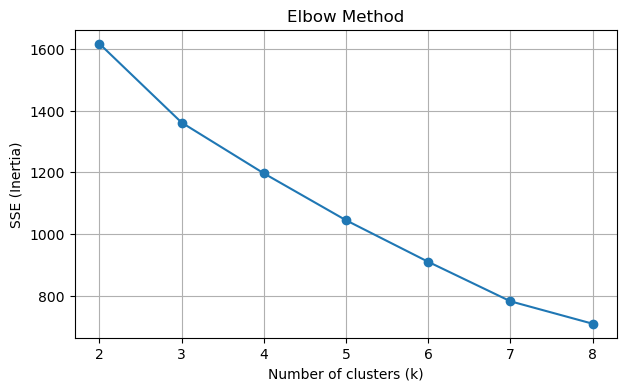


Cluster counts:
Cluster
0    140
1    173
2     41
Name: count, dtype: int64

Cluster profile (mean):


c:\Users\vietd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Population,Dwellings,Income,Vehicles_per_Dwelling,Station_Count,Public_Chargers,Charger_to_Pop_Ratio,Avg_Congestion
Cluster,,,,,,,,
0,11950.25,4806.86,2152.63,1.99,0.00,0.00,0.0,0.0
1,16897.29,11229.99,1733.58,1.62,0.00,0.00,0.0,0.0
2,17753.07,14685.66,1915.44,1.79,1.15,1.15,0.0,0.0



Cluster labels:
    Cluster                     Cluster_Label
0         2                    Urban EV-Ready
1         2       Emerging / Growth Potential
2         1  High Demand – Infrastructure Gap
3         0       Emerging / Growth Potential
7         1       Emerging / Growth Potential
15        0  High Demand – Infrastructure Gap

✅ Saved clustered data: ../datasets/clean/clustered_suburbs_final.csv


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ===============================
# STEP 5 - CLUSTERING
# ===============================

# Load master table
df = pd.read_csv("../datasets/clean/master_suburb_table_with_congestion.csv")

print("Data shape:", df.shape)

# -------------------------------
# 1) Chọn feature cho clustering
# -------------------------------
features = [
    "Population",
    "Dwellings",
    "Income",
    "Vehicles_per_Dwelling",
    "Station_Count",
    "Public_Chargers",
    "Charger_to_Pop_Ratio",
    "Avg_Congestion"
]

X = df[features].copy()

# Đảm bảo numeric
for col in features:
    X[col] = pd.to_numeric(X[col], errors="coerce")

print("\nMissing per feature:")
print(X.isna().sum())

# -------------------------------
# 2) Chuẩn hoá dữ liệu
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 3) Elbow Method (chọn k)
# -------------------------------
sse = []
K_range = range(2, 9)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K_range, sse, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

# -------------------------------
# 4) Chạy KMeans với k = 3 (business-friendly)
# -------------------------------
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print("\nCluster counts:")
print(df["Cluster"].value_counts().sort_index())

# -------------------------------
# 5) Profile cluster (mean values)
# -------------------------------
cluster_profile = (
    df.groupby("Cluster")[features]
      .mean()
      .round(2)
)

print("\nCluster profile (mean):")
display(cluster_profile)

# -------------------------------
# 6) Gán nhãn cluster (business interpretation)
# -------------------------------
def label_cluster(row):
    if row["Public_Chargers"] > df["Public_Chargers"].median() and row["Income"] > df["Income"].median():
        return "Urban EV-Ready"
    elif row["Public_Chargers"] <= df["Public_Chargers"].median() and row["Population"] > df["Population"].median():
        return "High Demand – Infrastructure Gap"
    else:
        return "Emerging / Growth Potential"

df["Cluster_Label"] = df.apply(label_cluster, axis=1)

print("\nCluster labels:")
print(df[["Cluster", "Cluster_Label"]].drop_duplicates())

# -------------------------------
# 7) Lưu kết quả
# -------------------------------
OUT_PATH = "../datasets/clean/clustered_suburbs_final.csv"
df.to_csv(OUT_PATH, index=False)

print(f"\n✅ Saved clustered data: {OUT_PATH}")


✅ Loaded: ../datasets/clean/master_suburb_table_with_congestion.csv
Shape: (354, 14)

Missing per feature:
Population               0
Dwellings                0
Income                   0
Vehicles_per_Dwelling    0
Station_Count            0
Public_Chargers          0
Charger_to_Pop_Ratio     0
Avg_Congestion           0
dtype: int64


c:\Users\vietd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\vietd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\vietd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\vietd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

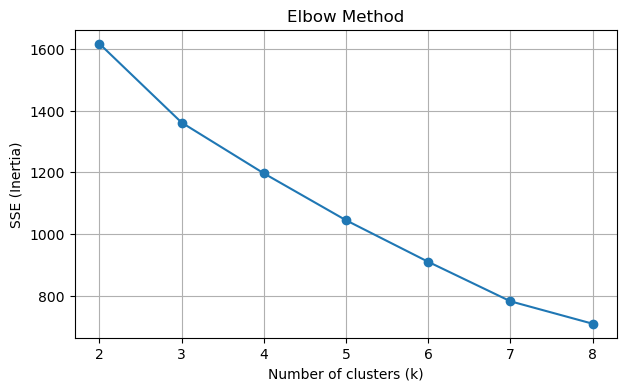


Cluster counts:
Cluster
0    140
1    173
2     41
Name: count, dtype: int64

Cluster profile (mean):


c:\Users\vietd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Population,Dwellings,Income,Vehicles_per_Dwelling,Station_Count,Public_Chargers,Charger_to_Pop_Ratio,Avg_Congestion
Cluster,,,,,,,,
0,11950.25,4806.86,2152.63,1.99,0.00,0.00,0.0,0.0
1,16897.29,11229.99,1733.58,1.62,0.00,0.00,0.0,0.0
2,17753.07,14685.66,1915.44,1.79,1.15,1.15,0.0,0.0



Cluster label mapping:
   Cluster                            Cluster_Label
3        0  Affluent Car-Dependent (High Potential)
2        1     High Population – Infrastructure Gap
0        2                         EV-Ready Suburbs

✅ Saved clustered data: ../datasets/clean/clustered_suburbs_final.csv


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ======================================================
# STEP 5 - CLUSTERING (gộp 1 cell)
# - Load master_suburb_table_with_congestion.csv
# - Elbow (k=2..8)
# - Fit KMeans k=3
# - Profile clusters
# - Gán nhãn theo Cluster ID (0/1/2)
# - Save output
# ======================================================

IN_PATH = "../datasets/clean/master_suburb_table_with_congestion.csv"
OUT_PATH = "../datasets/clean/clustered_suburbs_final.csv"

df = pd.read_csv(IN_PATH)
print("✅ Loaded:", IN_PATH)
print("Shape:", df.shape)

# -------------------------------
# 1) Chọn feature cho clustering
# -------------------------------
features = [
    "Population",
    "Dwellings",
    "Income",
    "Vehicles_per_Dwelling",
    "Station_Count",
    "Public_Chargers",
    "Charger_to_Pop_Ratio",
    "Avg_Congestion"
]

X = df[features].copy()

# Đảm bảo numeric
for col in features:
    X[col] = pd.to_numeric(X[col], errors="coerce")

print("\nMissing per feature:")
print(X.isna().sum())

# Nếu còn missing (không nên), fill median để tránh crash
X = X.fillna(X.median(numeric_only=True))

# -------------------------------
# 2) Chuẩn hoá dữ liệu
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 3) Elbow method
# -------------------------------
sse = []
K_range = range(2, 9)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(list(K_range), sse, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

# -------------------------------
# 4) Fit KMeans với k=3
# -------------------------------
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print("\nCluster counts:")
print(df["Cluster"].value_counts().sort_index())

# -------------------------------
# 5) Profile cluster (mean)
# -------------------------------
cluster_profile = (
    df.groupby("Cluster")[features]
      .mean()
      .round(2)
)

print("\nCluster profile (mean):")
display(cluster_profile)

# -------------------------------
# 6) Gán nhãn cluster theo KMeans (1 cluster = 1 label)
# -------------------------------
def label_cluster_by_id(c):
    if c == 0:
        return "Affluent Car-Dependent (High Potential)"
    elif c == 1:
        return "High Population – Infrastructure Gap"
    else:
        return "EV-Ready Suburbs"

df["Cluster_Label"] = df["Cluster"].apply(label_cluster_by_id)

print("\nCluster label mapping:")
print(df[["Cluster", "Cluster_Label"]].drop_duplicates().sort_values("Cluster"))

# -------------------------------
# 7) Save output
# -------------------------------
df.to_csv(OUT_PATH, index=False)
print(f"\n✅ Saved clustered data: {OUT_PATH}")


In [25]:
%pip install folium



   -------------------- ------------------- 1/2 [folium]
   ---------------------------------------- 2/2 [folium]

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import numpy as np
import folium

# ===============================
# MAP - Cluster Folium
# ===============================

# File đã cluster
CLUSTER_PATH = "../datasets/clean/clustered_suburbs_final.csv"

# Ưu tiên dùng coordinates_clean (suburb, latitude, longitude)
COORD_PATH_1 = "../datasets/clean/coordinates_clean.csv"          # bạn đã clean
COORD_PATH_2 = "../datasets/clean/coordinates_clean.csv"          # giữ fallback (nếu bạn đổi tên)
COORD_PATH_RAW = "../datasets/Co-oridnates.csv"                   # fallback cuối (nếu clean file bị thiếu)

OUT_HTML = "../datasets/clean/folium_cluster_map.html"

df = pd.read_csv(CLUSTER_PATH)
print("✅ Loaded clustered file:", CLUSTER_PATH, "shape:", df.shape)

# -------------------------------
# 1) Tạo suburb_key để join
# -------------------------------
def suburb_key_v3(s):
    if pd.isna(s):
        return ""
    s = str(s).lower().strip()
    s = s.replace("-", " ")
    s = " ".join(s.split())  # remove double spaces
    return s

df["suburb_key"] = df["suburb_key"].astype(str).str.strip() if "suburb_key" in df.columns else df["Suburb"].apply(suburb_key_v3)

# -------------------------------
# 2) Load tọa độ (ưu tiên clean)
# -------------------------------
coord = None
for p in [COORD_PATH_1, COORD_PATH_2, COORD_PATH_RAW]:
    try:
        tmp = pd.read_csv(p)
        coord = tmp
        print("✅ Loaded coordinates:", p, "shape:", coord.shape)
        break
    except Exception as e:
        pass

if coord is None:
    raise FileNotFoundError("❌ Không tìm thấy file coordinates. Kiểm tra path trong COORD_PATH_1/2/RAW")

# Chuẩn hoá cột
coord.columns = [c.strip().lower() for c in coord.columns]

# Nhiều file bạn có cột suburb bị viết sai "suburb" / "suburb" -> mình xử lý linh hoạt
if "suburb" not in coord.columns and "suburb " in coord.columns:
    coord.rename(columns={"suburb ": "suburb"}, inplace=True)

# Tạo key
if "suburb" in coord.columns:
    coord["suburb_key"] = coord["suburb"].apply(suburb_key_v3)
else:
    # nếu file raw dùng tên khác
    raise KeyError("❌ File coordinates không có cột 'suburb'")

# -------------------------------
# 3) Merge để có lat/lon
# -------------------------------
# Nếu df đã có latitude/longitude thì dùng, còn thiếu thì bổ sung từ coord
if "latitude" not in df.columns:
    df["latitude"] = np.nan
if "longitude" not in df.columns:
    df["longitude"] = np.nan

df = df.merge(
    coord[["suburb_key", "latitude", "longitude"]],
    on="suburb_key",
    how="left",
    suffixes=("", "_coord")
)

# Nếu latitude/longitude đang NaN thì lấy từ _coord
df["latitude"] = df["latitude"].fillna(df["latitude_coord"])
df["longitude"] = df["longitude"].fillna(df["longitude_coord"])
df.drop(columns=["latitude_coord", "longitude_coord"], inplace=True, errors="ignore")

n_total = len(df)
n_has_coords = df["latitude"].notna().sum()
print(f"\nSuburbs total: {n_total}")
print(f"Suburbs with coordinates: {n_has_coords}")
print(f"Suburbs missing coordinates: {n_total - n_has_coords}")

# -------------------------------
# 4) Tạo Folium map
# -------------------------------
# Center map theo median lat/lon của những suburb có tọa độ
center_lat = df.loc[df["latitude"].notna(), "latitude"].median()
center_lon = df.loc[df["longitude"].notna(), "longitude"].median()

m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Màu theo cluster id
cluster_colors = {
    0: "blue",
    1: "orange",
    2: "green"
}

for _, r in df.dropna(subset=["latitude", "longitude"]).iterrows():
    c = int(r["Cluster"])
    color = cluster_colors.get(c, "gray")
    popup = f"""
    <b>{r.get('Suburb','')}</b><br>
    Cluster: {r.get('Cluster','')}<br>
    Label: {r.get('Cluster_Label','')}<br>
    Population: {r.get('Population','')}<br>
    Public Chargers: {r.get('Public_Chargers','')}<br>
    Stations: {r.get('Station_Count','')}
    """
    folium.CircleMarker(
        location=[r["latitude"], r["longitude"]],
        radius=6,
        color=color,
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(popup, max_width=300)
    ).add_to(m)

m.save(OUT_HTML)
print(f"\n✅ Saved Folium map: {OUT_HTML}")
print("➡️ Mở file HTML bằng browser để xem map.")


✅ Loaded clustered file: ../datasets/clean/clustered_suburbs_final.csv shape: (354, 16)
✅ Loaded coordinates: ../datasets/clean/coordinates_clean.csv shape: (174, 3)

Suburbs total: 354
Suburbs with coordinates: 41
Suburbs missing coordinates: 313

✅ Saved Folium map: ../datasets/clean/folium_cluster_map.html
➡️ Mở file HTML bằng browser để xem map.


In [27]:
import pandas as pd
import numpy as np
import os

# ===============================
# Build coordinates per suburb from charger_info_mel_clean
# ===============================
CHARGER_PATH = "../datasets/clean/charger_info_mel_clean.csv"
OUT_COORD_FROM_CHARGERS = "../datasets/clean/suburb_coords_from_chargers.csv"

df_ch = pd.read_csv(CHARGER_PATH)

# Chuẩn hoá tên cột
df_ch.columns = [c.strip() for c in df_ch.columns]

# Kiểm tra cột bắt buộc
need_cols = ["Suburb", "latitude", "longitude"]
missing = [c for c in need_cols if c not in df_ch.columns]
if missing:
    raise KeyError(f"❌ Missing columns in charger file: {missing}")

# Làm sạch suburb_key giống bạn đang dùng
def suburb_key_v3(s):
    if pd.isna(s):
        return ""
    s = str(s).lower().strip()
    s = s.replace("-", " ")
    s = " ".join(s.split())
    return s

df_ch["suburb_key"] = df_ch["Suburb"].apply(suburb_key_v3)

# Ép numeric lat/lon
df_ch["latitude"] = pd.to_numeric(df_ch["latitude"], errors="coerce")
df_ch["longitude"] = pd.to_numeric(df_ch["longitude"], errors="coerce")

# Bỏ rows thiếu tọa độ
before = len(df_ch)
df_ch = df_ch.dropna(subset=["latitude", "longitude", "suburb_key"])
after = len(df_ch)

print("Rows in charger file:", before)
print("Rows usable (has lat/lon):", after)

# Tính tọa độ suburb = mean lat/lon
suburb_coords = (
    df_ch.groupby("suburb_key")[["latitude", "longitude"]]
    .mean()
    .reset_index()
)

suburb_coords.to_csv(OUT_COORD_FROM_CHARGERS, index=False)
print(f"✅ Saved: {OUT_COORD_FROM_CHARGERS}")
print("Unique suburbs with coords from chargers:", suburb_coords.shape[0])
suburb_coords.head()


Rows in charger file: 260
Rows usable (has lat/lon): 226
✅ Saved: ../datasets/clean/suburb_coords_from_chargers.csv
Unique suburbs with coords from chargers: 173


,suburb_key,latitude,longitude
0,abbotsford,-37.804551,144.998854
1,airport west,-37.722258,144.883494
2,albury,-37.544234,145.007641
3,alexandra,-37.821242,144.973663
4,altona,-37.867150,144.829464


In [28]:
import pandas as pd
import numpy as np
import folium

CLUSTER_PATH = "../datasets/clean/clustered_suburbs_final.csv"
COORD_BASE = "../datasets/clean/coordinates_clean.csv"
COORD_FROM_CHARGERS = "../datasets/clean/suburb_coords_from_chargers.csv"

OUT_HTML = "../datasets/clean/folium_cluster_map_v2.html"

df = pd.read_csv(CLUSTER_PATH)

def suburb_key_v3(s):
    if pd.isna(s):
        return ""
    s = str(s).lower().strip()
    s = s.replace("-", " ")
    s = " ".join(s.split())
    return s

df["suburb_key"] = df["suburb_key"].astype(str).str.strip() if "suburb_key" in df.columns else df["Suburb"].apply(suburb_key_v3)

# Load coords
base = pd.read_csv(COORD_BASE)
base.columns = [c.strip().lower() for c in base.columns]
base["suburb_key"] = base["suburb"].apply(suburb_key_v3)
base = base[["suburb_key", "latitude", "longitude"]].dropna()

extra = pd.read_csv(COORD_FROM_CHARGERS)
extra["suburb_key"] = extra["suburb_key"].apply(lambda x: str(x).strip())
extra = extra[["suburb_key", "latitude", "longitude"]].dropna()

# Merge ưu tiên: base coords trước, thiếu thì dùng charger-derived
df = df.merge(base, on="suburb_key", how="left", suffixes=("", "_base"))
df = df.merge(extra, on="suburb_key", how="left", suffixes=("", "_extra"))

df["latitude"] = df["latitude"].fillna(df["latitude_extra"])
df["longitude"] = df["longitude"].fillna(df["longitude_extra"])

# cleanup
df.drop(columns=["latitude_extra", "longitude_extra"], inplace=True, errors="ignore")

n_total = len(df)
n_has_coords = df["latitude"].notna().sum()
print(f"Suburbs total: {n_total}")
print(f"Suburbs with coordinates: {n_has_coords}")
print(f"Suburbs missing coordinates: {n_total - n_has_coords}")

# Center
center_lat = df.loc[df["latitude"].notna(), "latitude"].median()
center_lon = df.loc[df["longitude"].notna(), "longitude"].median()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

cluster_colors = {0: "blue", 1: "orange", 2: "green"}

for _, r in df.dropna(subset=["latitude","longitude"]).iterrows():
    color = cluster_colors.get(int(r["Cluster"]), "gray")
    popup = f"""
    <b>{r.get('Suburb','')}</b><br>
    Cluster: {r.get('Cluster','')}<br>
    Label: {r.get('Cluster_Label','')}<br>
    Population: {r.get('Population','')}<br>
    Public Chargers: {r.get('Public_Chargers','')}<br>
    Stations: {r.get('Station_Count','')}
    """
    folium.CircleMarker(
        location=[r["latitude"], r["longitude"]],
        radius=6,
        color=color,
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(popup, max_width=320)
    ).add_to(m)

m.save(OUT_HTML)
print(f"✅ Saved Folium map: {OUT_HTML}")


Suburbs total: 354
Suburbs with coordinates: 41
Suburbs missing coordinates: 313
✅ Saved Folium map: ../datasets/clean/folium_cluster_map_v2.html
